# Introduction

Houses prices is a small standard Regression problem, the data set was token from a kaggle competition, formatted in the AutoML format.

In [102]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.


In [103]:
datadir = 'sample_data/'             
basename = 'houseprice'
!ls $datadir*

sample_data/houseprice_feat.name      sample_data/houseprice_train.data
sample_data/houseprice_label.name     sample_data/houseprice_train.solution
sample_data/houseprice_test.data      sample_data/houseprice_valid.data
sample_data/houseprice_test.solution  sample_data/houseprice_valid.solution


In [104]:
# We read data as Panda data frames
feat_name = pd.read_csv(datadir+basename + '_feat.name', header=None)
label_name = pd.read_csv(datadir+basename + '_label.name', header=None)


X = pd.read_csv(datadir+basename + '_train.data', sep=' ', names = np.ravel(feat_name))
Y = pd.read_csv(datadir+ basename + '_train.solution', sep=' ', names = np.ravel(label_name))



X_valid = pd.read_csv(datadir+basename + '_valid.data', sep=' ', names = np.ravel(feat_name))
Y_valid = pd.read_csv(datadir+ basename + '_valid.solution', sep=' ', names = np.ravel(label_name))
X_test = pd.read_csv(datadir+basename + '_test.data', sep=' ', names = np.ravel(feat_name))
Y_test = pd.read_csv(datadir+ basename + '_test.solution', sep=' ', names = np.ravel(label_name))



X['waterfront'] = X['waterfront'].astype('category',ordered=True)
X['view'] = X['view'].astype('category',ordered=True)
X['condition'] = X['condition'].astype('category',ordered=True)
X['grade'] = X['grade'].astype('category',ordered=False)


X_valid['waterfront'] = X_valid['waterfront'].astype('category',ordered=True)
X_valid['view'] = X_valid['view'].astype('category',ordered=True)
X_valid['condition'] = X_valid['condition'].astype('category',ordered=True)
X_valid['grade'] = X_valid['grade'].astype('category',ordered=False)


X_test['waterfront'] = X_test['waterfront'].astype('category',ordered=True)
X_test['view'] = X_test['view'].astype('category',ordered=True)
X_test['condition'] = X_test['condition'].astype('category',ordered=True)
X_test['grade'] = X_test['grade'].astype('category',ordered=False)

[patnum, featnum] = X.shape
[patnum2, classnum] = Y.shape
assert(patnum==patnum2)
print 'Number of examples = %d' % patnum
print 'Number of features = %d' % featnum
print 'Number of variables to predict = %d' % classnum

Number of examples = 100
Number of features = 18
Number of variables to predict = 1


In [105]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000
mean,3.270000,1.800000,2109.030000,14252.370000,1.530000,1842.120000,266.910000,1970.800000,120.080000,98086.130000,47.0,-121.930000,2015.720000,13273.380000
std,0.802207,0.778499,965.116306,35109.687847,0.610597,825.823975,421.738899,32.413365,477.691284,53.207551,0.0,0.256432,624.246132,33179.528865
min,2.000000,0.000000,590.000000,987.000000,1.000000,590.000000,0.000000,1905.000000,0.000000,98001.000000,47.0,-122.000000,1030.000000,1230.000000
25%,3.000000,1.000000,1417.500000,4658.250000,1.000000,1200.000000,0.000000,1947.000000,0.000000,98041.500000,47.0,-122.000000,1530.000000,5206.750000
50%,3.000000,2.000000,1940.000000,7054.000000,1.000000,1625.000000,0.000000,1975.500000,0.000000,98097.000000,47.0,-122.000000,1930.000000,7200.000000
75%,4.000000,2.000000,2567.500000,11995.500000,2.000000,2295.000000,465.000000,2000.000000,0.000000,98122.000000,47.0,-122.000000,2322.500000,9450.000000
max,5.000000,4.000000,6330.000000,308080.000000,3.000000,4900.000000,1510.000000,2014.000000,2013.000000,98199.000000,47.0,-121.000000,3890.000000,247856.000000


In [106]:
Y.head()

,price
0,699000
1,285000
2,480000
3,359900
4,847000


In [107]:
# Here we add the target values as a last column, this is convenient to use seaborn
numerical_target = Y['price'] 

XY = X.assign(price=numerical_target.values) 


Let's first display the distribution of the target column (price) using a boxplot.

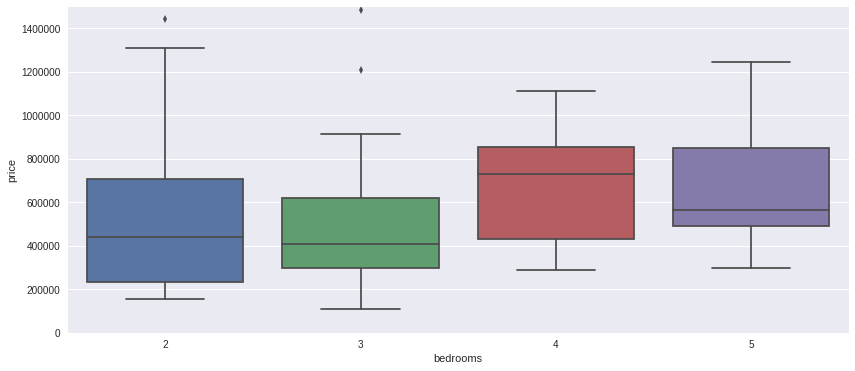

In [108]:
var = 'bedrooms'
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y='price', data=XY)
fig.axis(ymin=0, ymax=1500000);


we can also use a histogram for our target variable

(-0.5, 8.5, 0, 1750000)

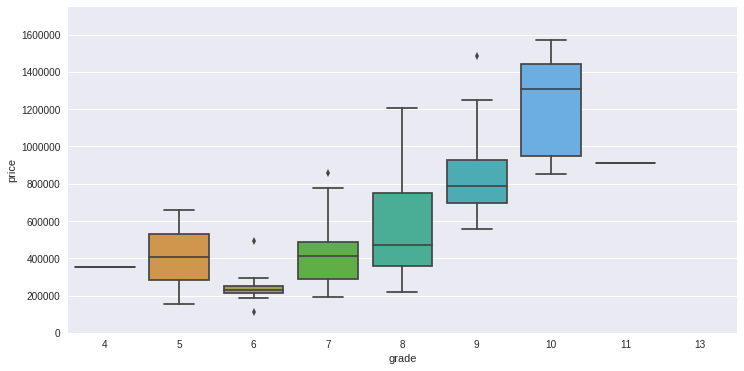

In [109]:
var = 'grade'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y='price', data=XY)
fig.axis(ymin=0, ymax=1750000)

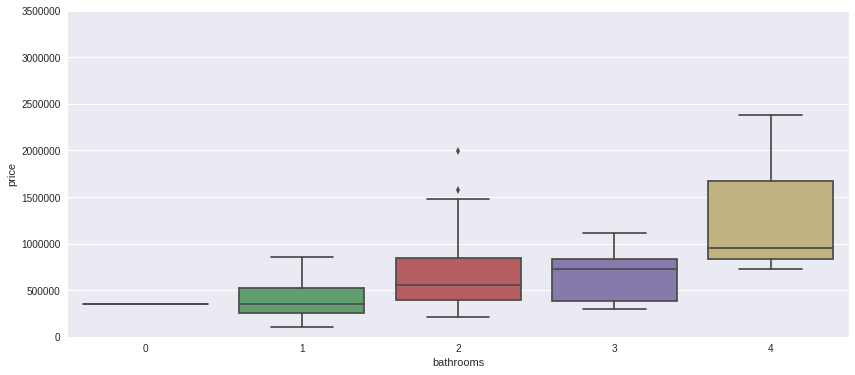

In [110]:
var = 'bathrooms'
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=XY)
fig.axis(ymin=0, ymax=3500000);

In [111]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,2,2010,4320,2,0,2,3,9,2010,0,1999,0,98118,47,-122,1640,5225
1,3,2,1840,6214,1,0,0,4,7,1270,570,1983,0,98031,47,-122,1840,6214
2,5,2,2550,7725,1,0,0,5,8,1390,1160,1967,0,98056,47,-122,2450,7725
3,4,2,2470,7698,2,0,0,3,8,2470,0,1983,0,98058,47,-122,2330,7986
4,5,1,2550,4623,2,0,0,4,9,2550,0,1905,0,98122,47,-122,1570,3875
5,4,2,3020,36893,2,0,0,3,9,3020,0,1986,2007,98077,47,-122,3020,36444
6,4,1,1500,8400,1,0,0,3,7,1200,300,1956,0,98188,47,-122,1780,9913
7,3,4,3300,308080,2,0,2,4,9,2520,780,1976,0,98070,47,-122,2130,90604
8,5,3,2860,20790,1,0,0,4,7,1800,1060,1965,0,98155,47,-122,1920,9612
9,4,2,2450,5376,1,0,0,4,7,1550,900,1920,0,98117,47,-122,1920,5264


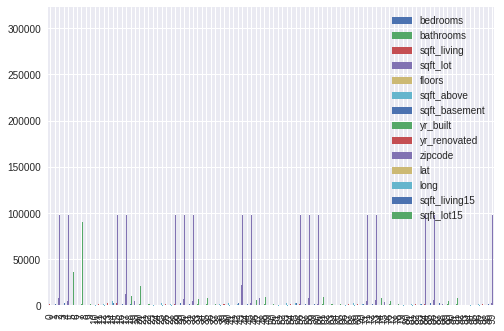

In [112]:
X.plot(kind='bar' )

(array([  5.,  13.,  18.,  12.,   9.,   8.,   8.,   6.,   9.,   1.,   2.,
          0.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([  110000.,   201000.,   292000.,   383000.,   474000.,   565000.,
          656000.,   747000.,   838000.,   929000.,  1020000.,  1111000.,
         1202000.,  1293000.,  1384000.,  1475000.,  1566000.,  1657000.,
         1748000.,  1839000.,  1930000.,  2021000.,  2112000.,  2203000.,
         2294000.,  2385000.]),
 <a list of 25 Patch objects>)

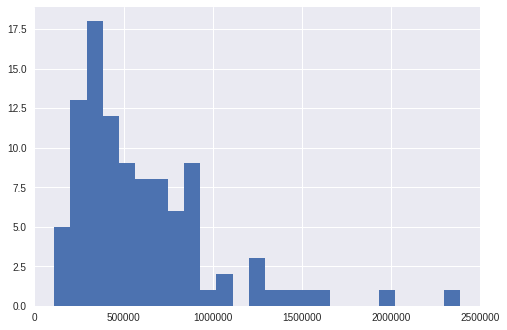

In [113]:
plt.hist(XY.price, bins = 25)

Immediately, we notice that the distribution is skewed towards cheaper homes. To make the distribution more symmetric, we can use its logarithm:

(array([  1.,   0.,   1.,   0.,   3.,   4.,   5.,   4.,   5.,  12.,   7.,
          8.,   6.,   4.,   7.,  10.,   9.,   3.,   2.,   3.,   2.,   2.,
          0.,   1.,   1.]),
 array([ 11.60823564,  11.73129461,  11.85435357,  11.97741253,
         12.10047149,  12.22353045,  12.34658941,  12.46964838,
         12.59270734,  12.7157663 ,  12.83882526,  12.96188422,
         13.08494318,  13.20800214,  13.33106111,  13.45412007,
         13.57717903,  13.70023799,  13.82329695,  13.94635591,
         14.06941487,  14.19247384,  14.3155328 ,  14.43859176,
         14.56165072,  14.68470968]),
 <a list of 25 Patch objects>)

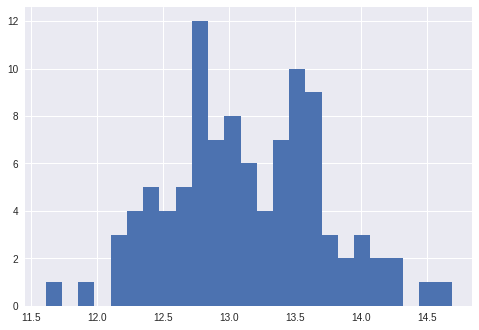

In [114]:
plt.hist(np.log(XY.price), bins = 25)

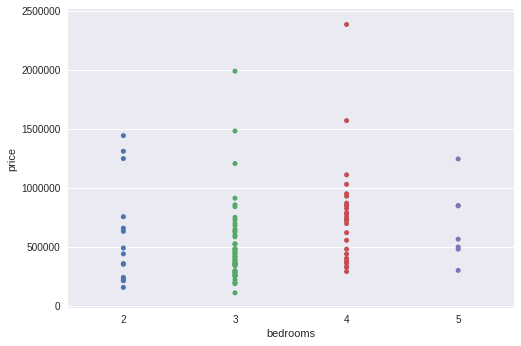

In [115]:
sns.stripplot(x='bedrooms', y='price',data=XY)

The graph indicates that the relation of price with bedrooms. Price goes up with number of bedrooms upto 6 and then comes down as no of bedrooms increase.

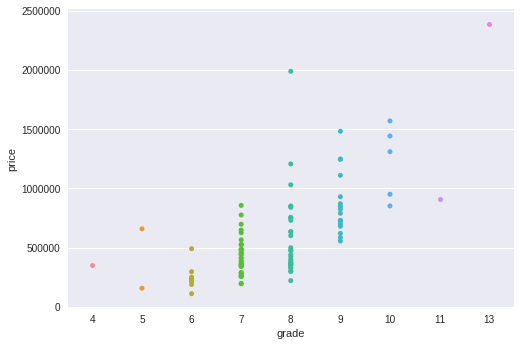

In [116]:
sns.stripplot(x='grade', y='price',data=XY, size=5)


Price of the house is dependent on grade of the house, higher the grade higher the price.

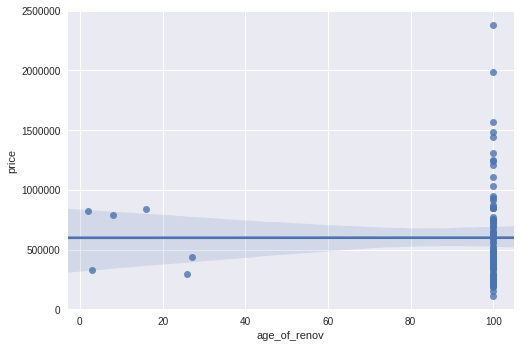

In [117]:
df=XY
df['age_of_renov'] = 100
df.loc[df['yr_renovated'] != 0,'age_of_renov'] = 2015-df.loc[df['yr_renovated'] != 0,'yr_renovated']

sns.regplot(x='age_of_renov',y='price',data=XY)

the relation between the price and age of renovation

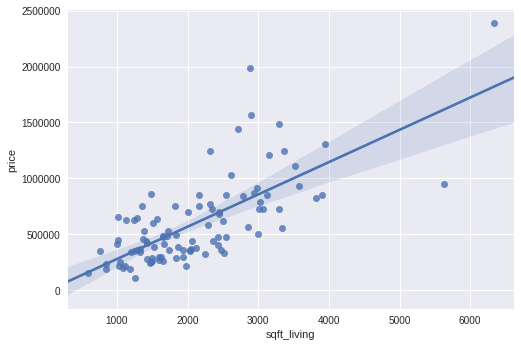

In [118]:
sns.regplot(x='sqft_living',y='price',data=XY)

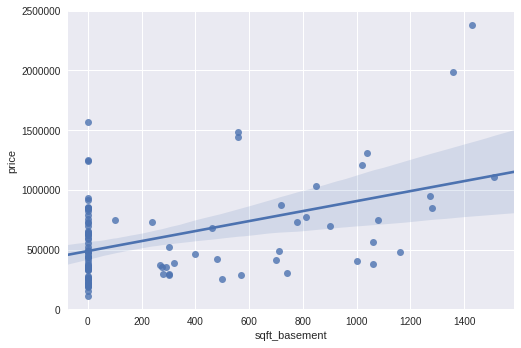

In [119]:
sns.regplot(x='sqft_basement',y='price',data=XY)

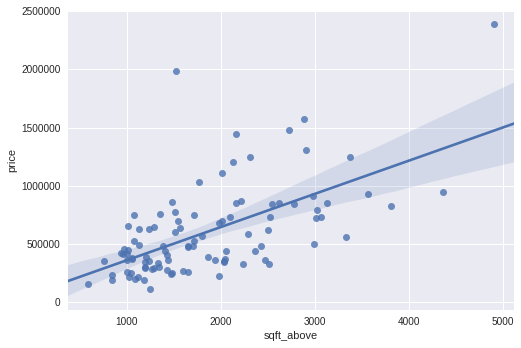

In [120]:
sns.regplot(x='sqft_above',y='price',data=XY)


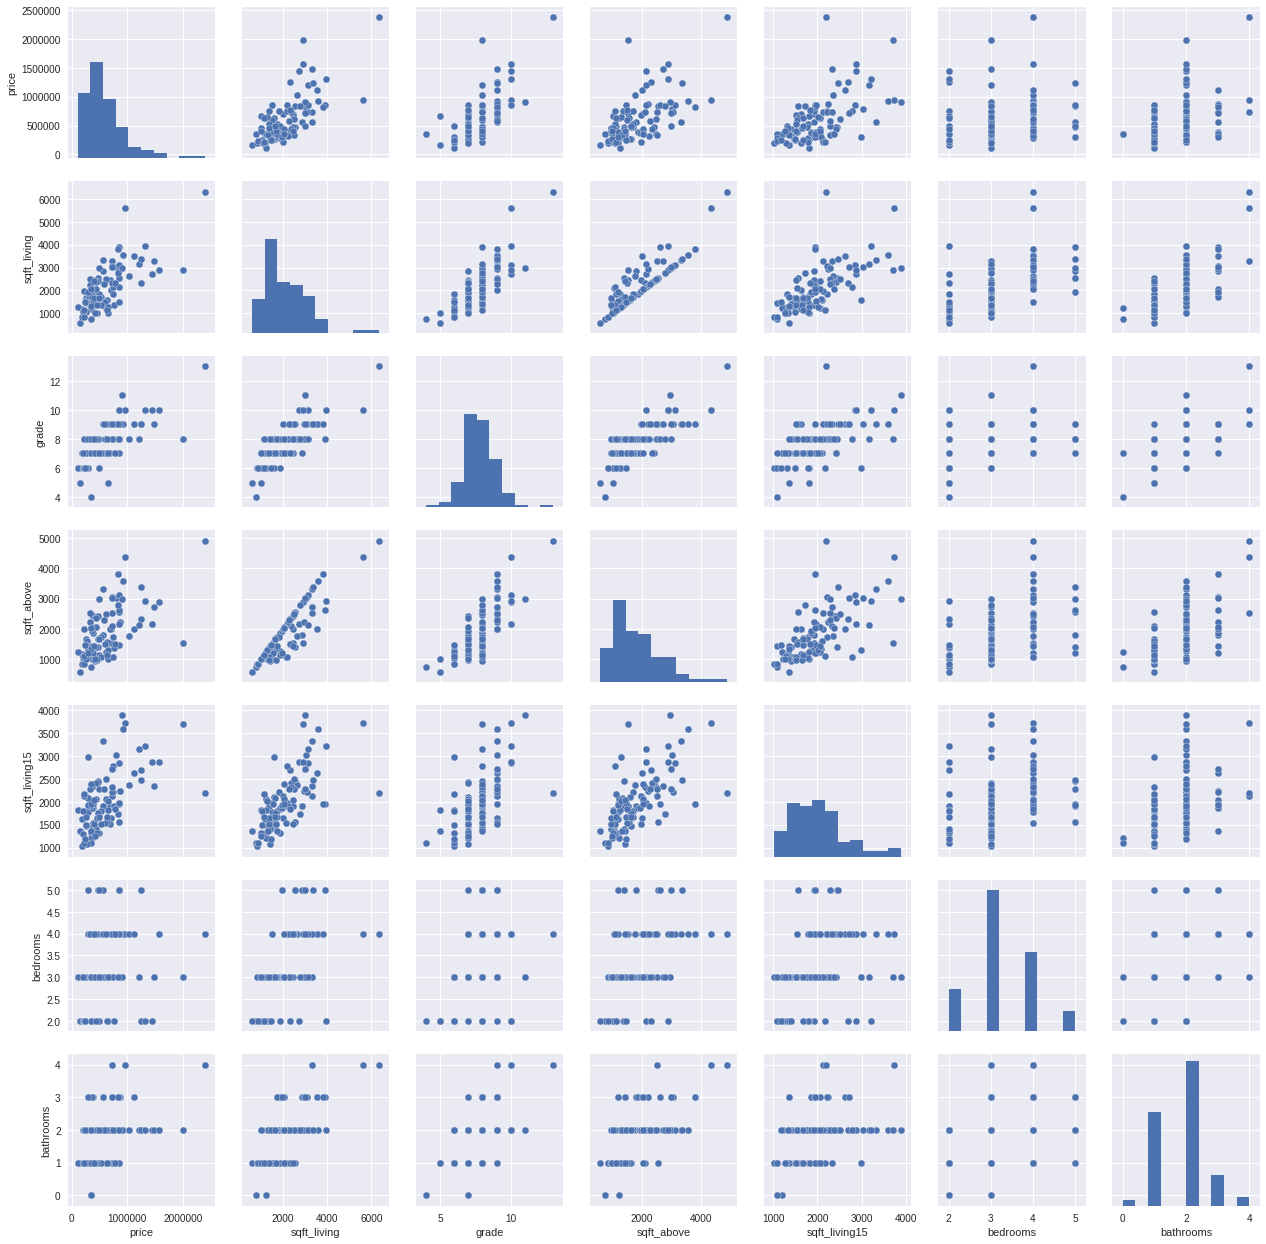

In [121]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms','bathrooms']
sns.pairplot(XY[cols], size = 2.5,  palette='afmhot')
plt.show();

<class 'pandas.core.frame.DataFrame'>


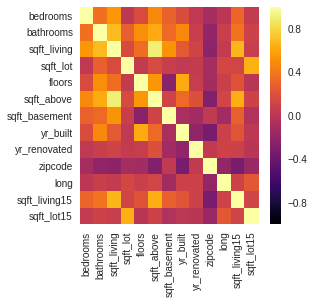

In [122]:
print type(X)
plt.figure(figsize=(4,4))
X=X.drop('lat',1)
sns.heatmap(X.corr(), cmap='inferno')


# Building predictive models
The initial classifier in your sandbox.



In [123]:
X = X.values
y=numerical_target 

X_test = X_test.values
y_test=Y_test['price']

X_valid = X_valid.values
y_valid=Y_valid['price']

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor

class Classifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.clf = linear_model.LinearRegression()
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

In [124]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold # import KFold --> do the cross-validation
from numpy import zeros, mean

nb_split=3
kf = KFold(nb_split,True) # Define the split - into 2 folds 
i=0
scores = zeros(nb_split)

    
for idx_t, idx_v in kf.split(X):
    Xtr = X[idx_t]
    Ytr = y[idx_t]
   
    Xva = X[idx_v]
    Yva = y[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    scores[i] =r2_score(Yva,Y_predict )
    print 'Fold', i+1, 'R2 score metric = ', scores[i]
    i=i+1
print 'Average score = ', mean(scores)

Fold 1 R2 score metric =  0.543211387862
Fold 2 R2 score metric =  0.406047664562
Fold 3 R2 score metric =  0.119033141645
Average score =  0.356097398023


In [125]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

# This will perform 2-fold cross-validation
# for 0.18 version or newer, use:
from sklearn.model_selection import cross_val_score

# for pre-0.18 versions of scikit, use:
from sklearn.cross_validation import cross_val_score


scores = cross_val_score(linear_model.LinearRegression(), X, y, cv=3)
print scores

[ 0.66380632  0.51766473  0.13339325]


In [126]:
outdir = 'sample_result_submission'

In [127]:
from model import model

In [128]:
M = model()
trained_model_name = model_dir + basename
M = M.load(trained_model_name)

Model reloaded from: sample_code_submission/houseprice_model.pickle


In [129]:
if not(M.is_trained):
    X_train = X
    Y_train = numerical_target
    M.fit(X_train, Y_train)  
Y_hat_train = M.predict(X) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(X_valid)
Y_hat_test = M.predict(X_test)




PREDICT: dim(X)= [100, 17]
ARRGH: number of features in X does not match training data!
PREDICT: dim(y)= [100, 1]


ValueError: shapes (100,17) and (18,) not aligned: 17 (dim 1) != 18 (dim 0)

Save the trained model (will be ready to reload next time around) and save the prediction results:

In [ ]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + basename
#import os
#os.write(result_name + '_valid.predict', Y_hat_valid)
#os.write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [ ]:
outdir = 'sample_result_submission'

In [ ]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

# Making submission

In [ ]:
outdir = 'sample_result_submission'
!python2 $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir